In [109]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = datasets.load_boston()
#print(data.DESCR)
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["target"])
print(df.describe(include='all'))

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

           target
count  506.000000
mean    22.532806
std      9.197104
min      5.000000
25%     17.025000
50%     21.200000
75%     25.000000
max     50.000000


/Users/sabrina/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: 1.108098
Kurtosis: 1.495197


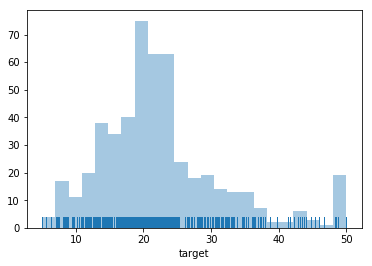

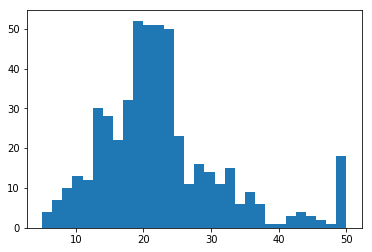

In [12]:
print(target.describe())
sns.distplot(target['target'], kde=False, rug=True)
fig, ax = plt.subplots()
ax.hist(target['target'], bins = 30)
#skewness and kurtosis
print("Skewness: %f" % target['target'].skew())
print("Kurtosis: %f" % target['target'].kurt())

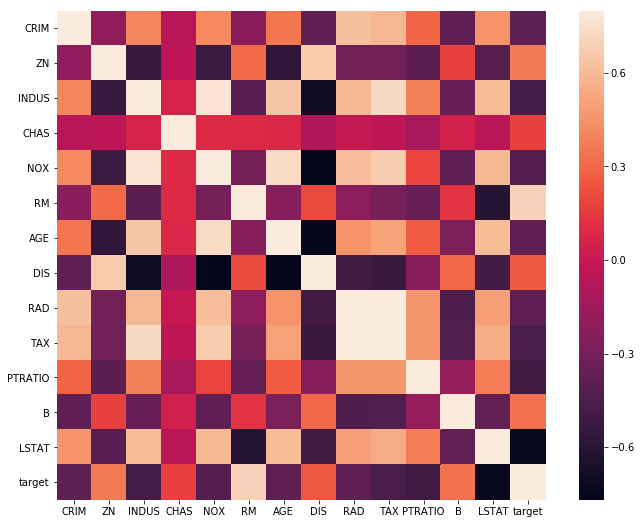

In [199]:
train = pd.concat([df, target], axis=1)

#correlation matrix  & heatmap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

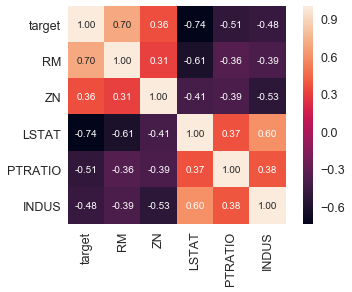

In [252]:
#most correlated with target
corrs = corrmat.iloc[:,-1].abs()
corrs.name = 'corrs'
corrs = corrs.sort_values(ascending=False) 
idx = corrs.index[1:6] #5 most important features
C = corrmat.loc[idx, 'target']
#print(C)

#alternative 
k = 3 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target']
cols2 = corrmat.nsmallest(k, 'target')['target']
#print("largest\n", cols)
#print("\nlargest negative\n", cols2)
idx = pd.concat([cols, cols2]).index
cm = corrmat.loc[idx, idx]
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=idx.values, xticklabels=idx.values)
plt.show()


In [265]:
#Most correlated pairwise
corrs2 = train.corr().abs()
os = (corrs2.where(np.triu(np.ones(corrs2.shape), k=1).astype(np.bool)).stack())
corrs2 = os.sort_values(ascending=False)[0:10]
print(corrs2)

RAD    TAX       0.910228
NOX    DIS       0.769230
INDUS  NOX       0.763651
AGE    DIS       0.747881
LSTAT  target    0.737663
NOX    AGE       0.731470
INDUS  TAX       0.720760
       DIS       0.708027
RM     target    0.695360
NOX    TAX       0.668023
dtype: float64


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'target']


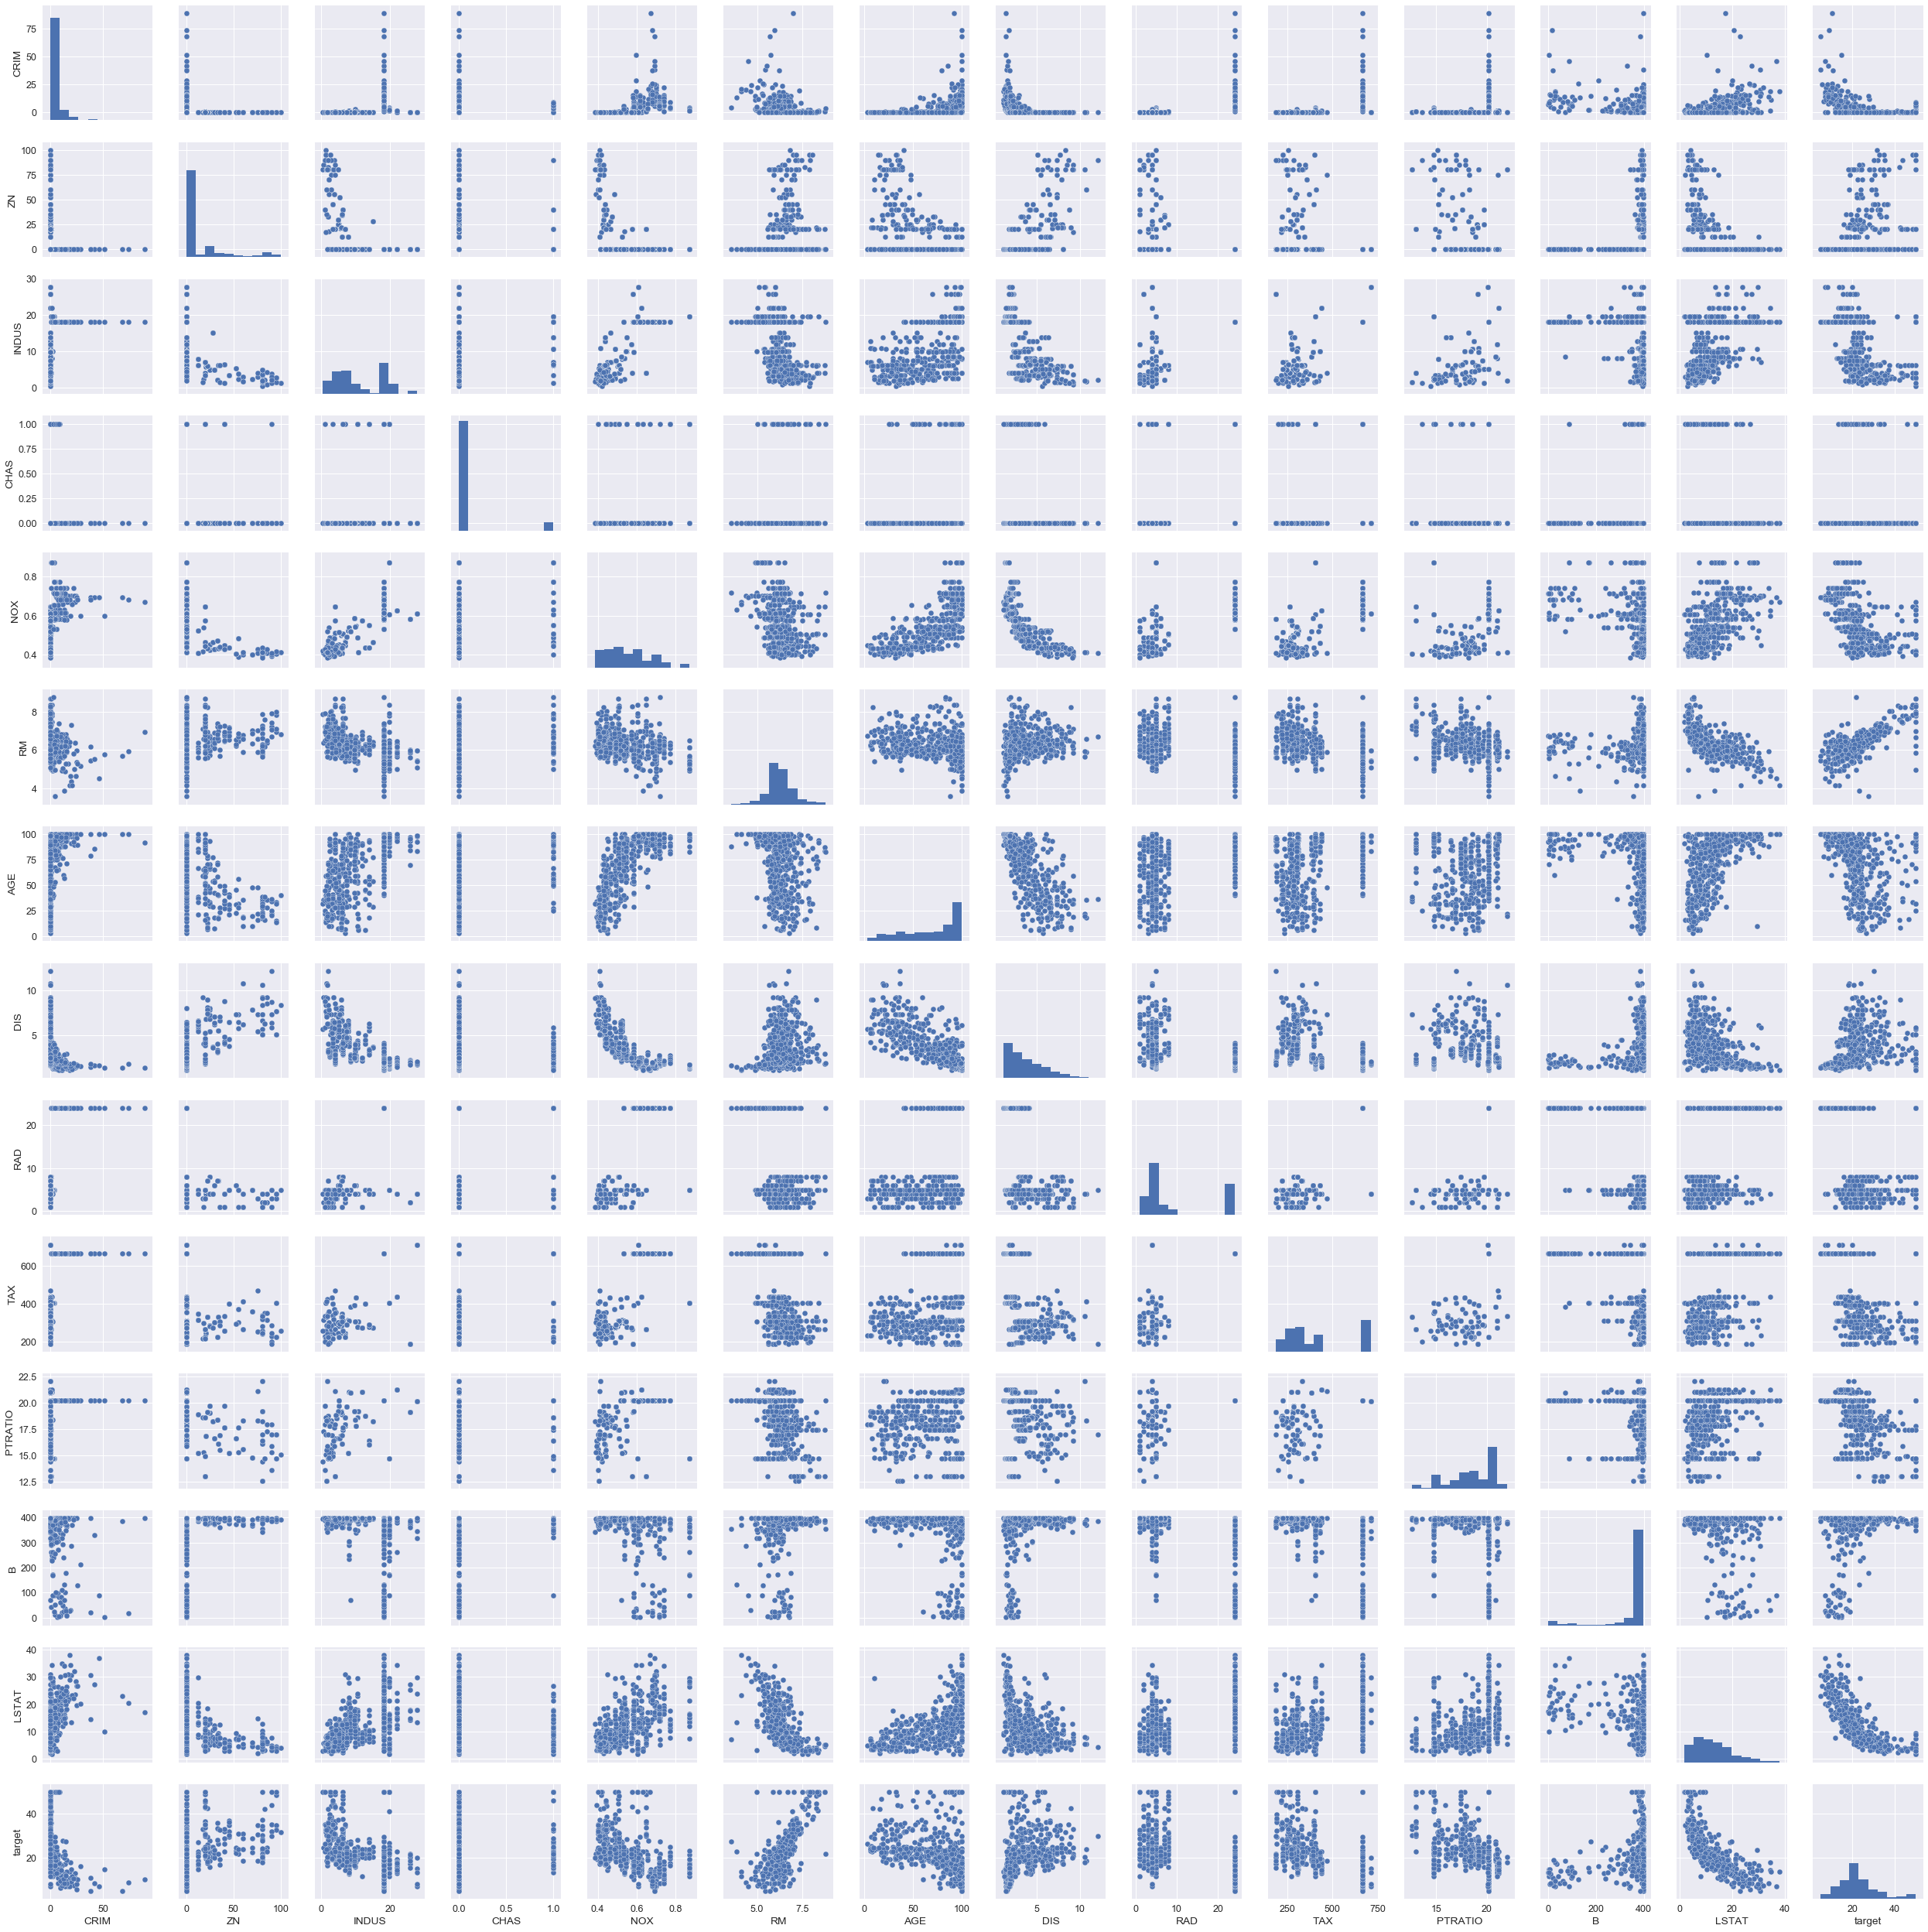

In [266]:
print(idx)
idx = corrs2.index.levels[0].values
sns.pairplot(train.loc[:, idx])